In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
# Basic dataset information
print("Dataset shape:", df.shape)
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

Dataset shape: (569, 31)
First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst 

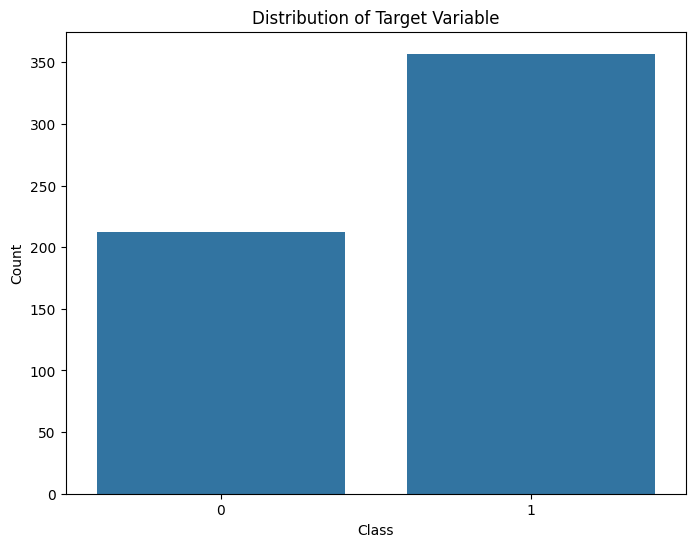

In [4]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

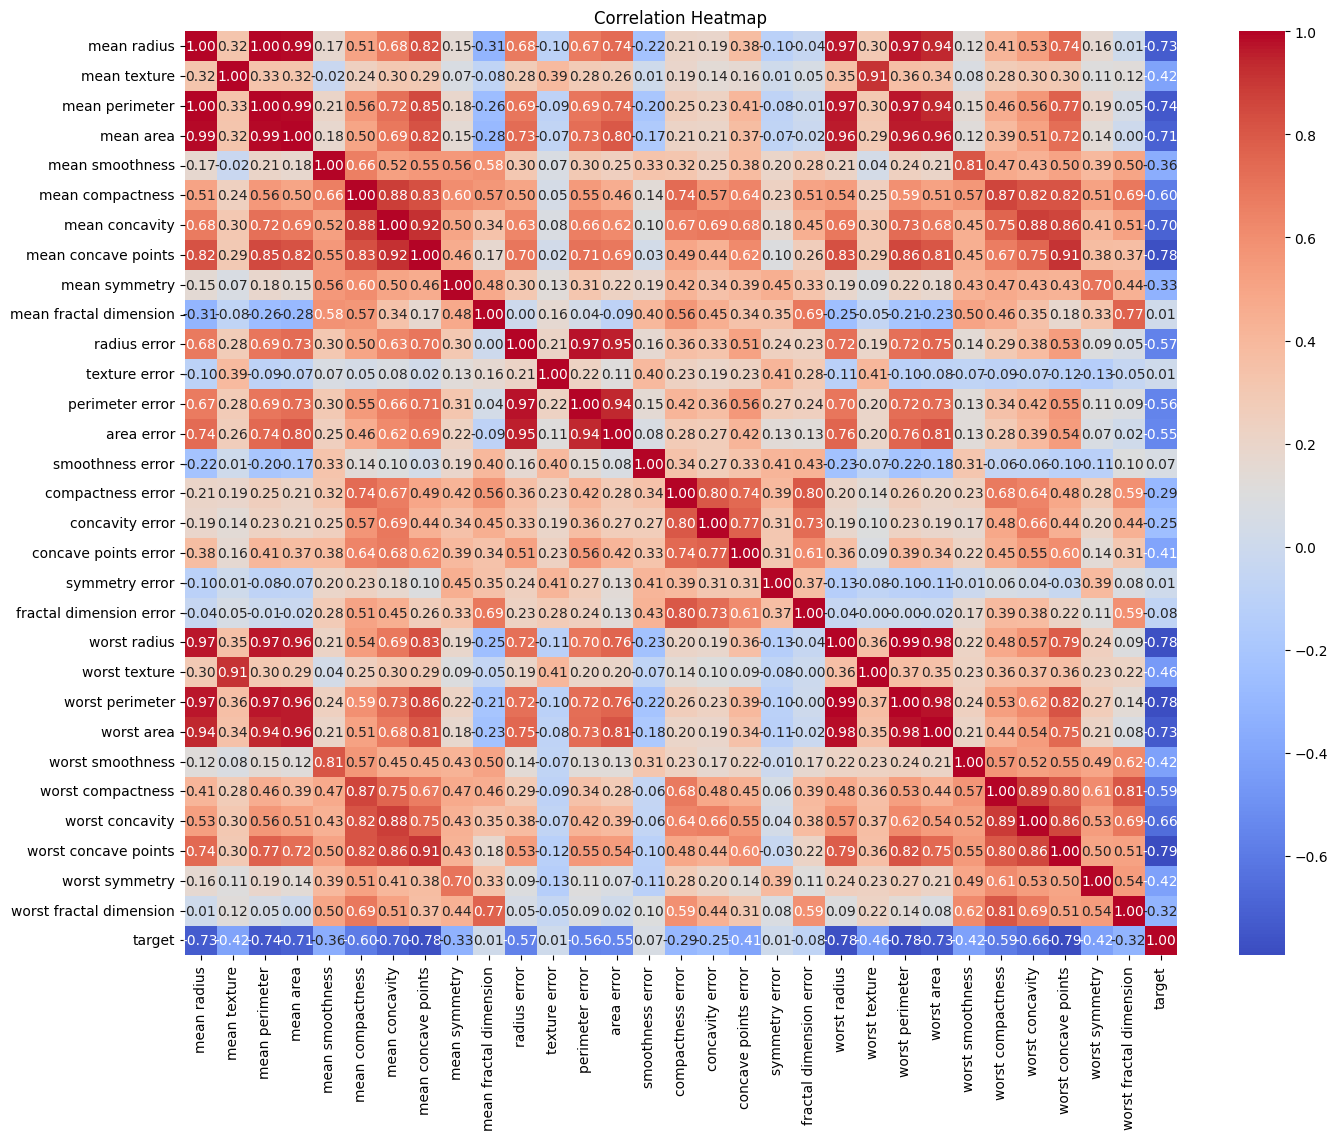

In [5]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There are many features highly correlated, it'll be better to address this issue.

In [6]:
def drop_highly_correlated_features(df, threshold=0.9):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Upper triangle of the correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation greater than the threshold
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    
    # Drop the features
    df_reduced = df.drop(to_drop, axis=1)
    
    return df_reduced, to_drop



In [8]:
df_reduced, dropped_features = drop_highly_correlated_features(df.drop('target', axis=1), threshold=0.9)
df_reduced['target'] = df['target']
print("Dropped features:")
print(dropped_features)

print("\nShape of the DataFrame before dropping features:", df.shape)
print("Shape of the DataFrame after dropping features:", df_reduced.shape)

Dropped features:
['mean perimeter', 'mean area', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concave points']

Shape of the DataFrame before dropping features: (569, 31)
Shape of the DataFrame after dropping features: (569, 21)


In [10]:
df_reduced.describe()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.181162,0.062798,0.405172,1.216853,0.007041,...,0.031894,0.011796,0.020542,0.003795,0.132369,0.254265,0.272188,0.290076,0.083946,0.627417
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.027414,0.007060,0.277313,0.551648,0.003003,...,0.030186,0.006170,0.008266,0.002646,0.022832,0.157336,0.208624,0.061867,0.018061,0.483918
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960,0.111500,0.360200,0.001713,...,0.000000,0.000000,0.007882,0.000895,0.071170,0.027290,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.161900,0.057700,0.232400,0.833900,0.005169,...,0.015090,0.007638,0.015160,0.002248,0.116600,0.147200,0.114500,0.250400,0.071460,0.000000
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.179200,0.061540,0.324200,1.108000,0.006380,...,0.025890,0.010930,0.018730,0.003187,0.131300,0.211900,0.226700,0.282200,0.080040,1.000000
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.195700,0.066120,0.478900,1.474000,0.008146,...,0.042050,0.014710,0.023480,0.004558,0.146000,0.339100,0.382900,0.317900,0.092080,1.000000
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.304000,0.097440,2.873000,4.885000,0.031130,...,0.396000,0.052790,0.078950,0.029840,0.222600,1.058000,1.252000,0.663800,0.207500,1.000000


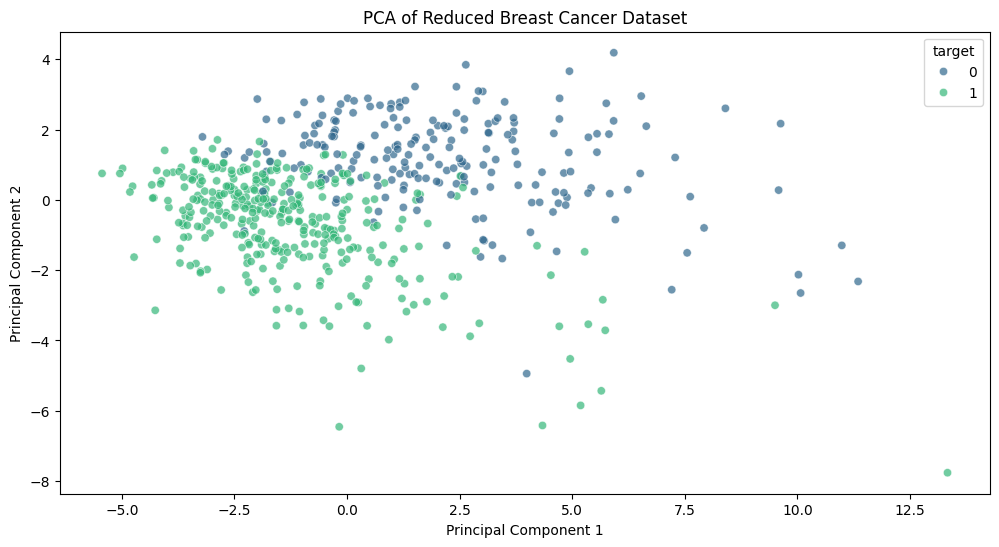

Explained variance ratio of the principal components:
[0.42612628 0.1345146 ]


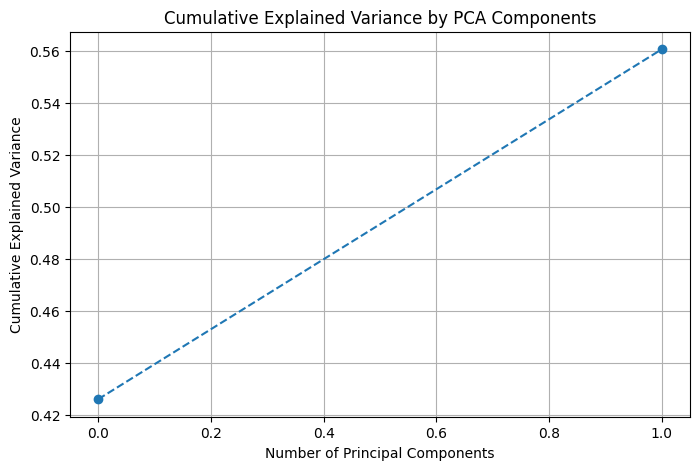

In [8]:
df_reduced['target'] = df['target']

# Separate features and target variable
X = df_reduced.drop('target', axis=1)
y = df_reduced['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y.values

# Visualize the principal components
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis', alpha=0.7)
plt.title('PCA of Reduced Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio
print("Explained variance ratio of the principal components:")
print(pca.explained_variance_ratio_)

# Cumulative explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity'],
      dtype='object')


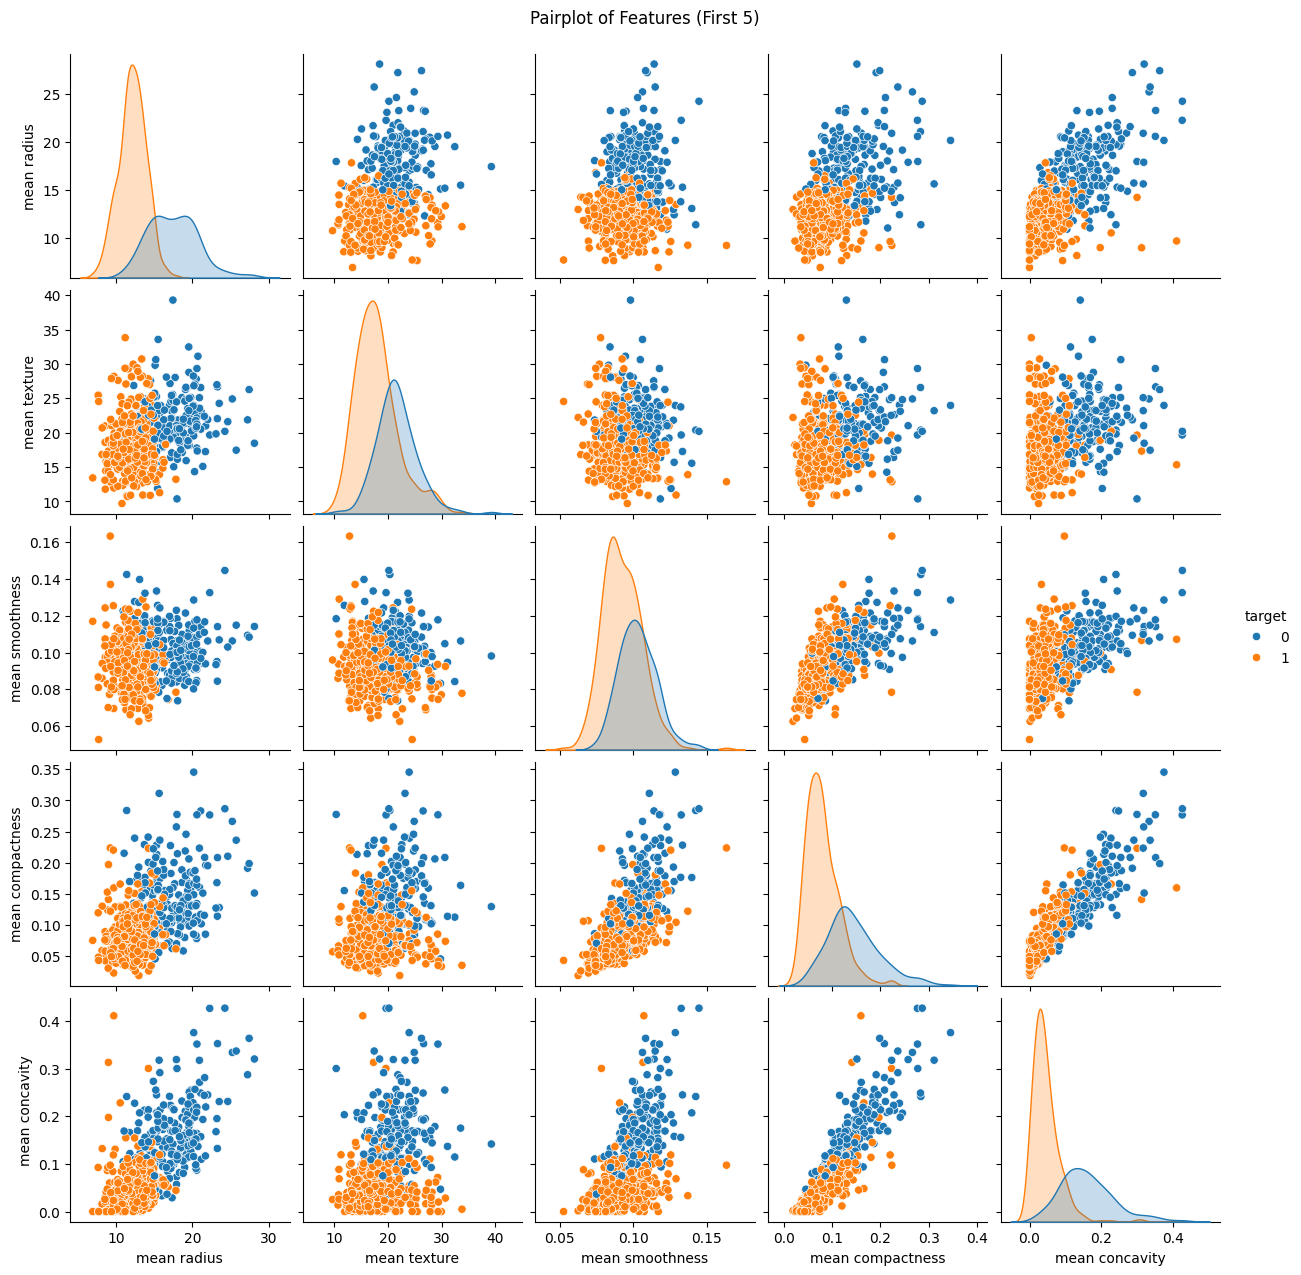

In [14]:
# Pairplot of features with target
feature_names=df_reduced.columns[:5]

sns.pairplot(df, hue='target', vars=feature_names)
plt.suptitle('Pairplot of Features (First 5)', y=1.02)
plt.show()

In [17]:
# Apply PCA to the original df
scaler = StandardScaler()
X = data.data
y = data.target
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) 

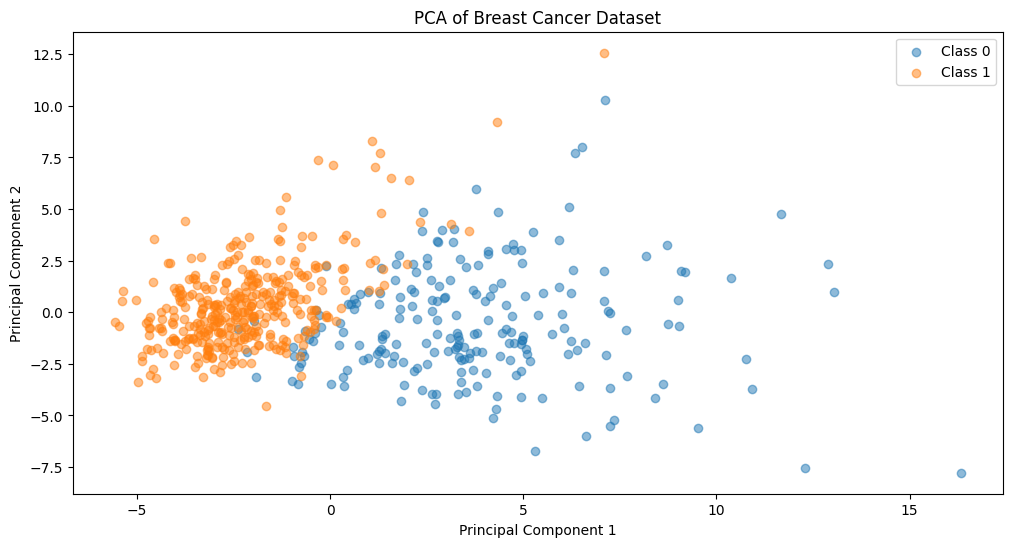

In [18]:
# Visualizing the PCA results of original df
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Class 0', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Class 1', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.legend()
plt.show()

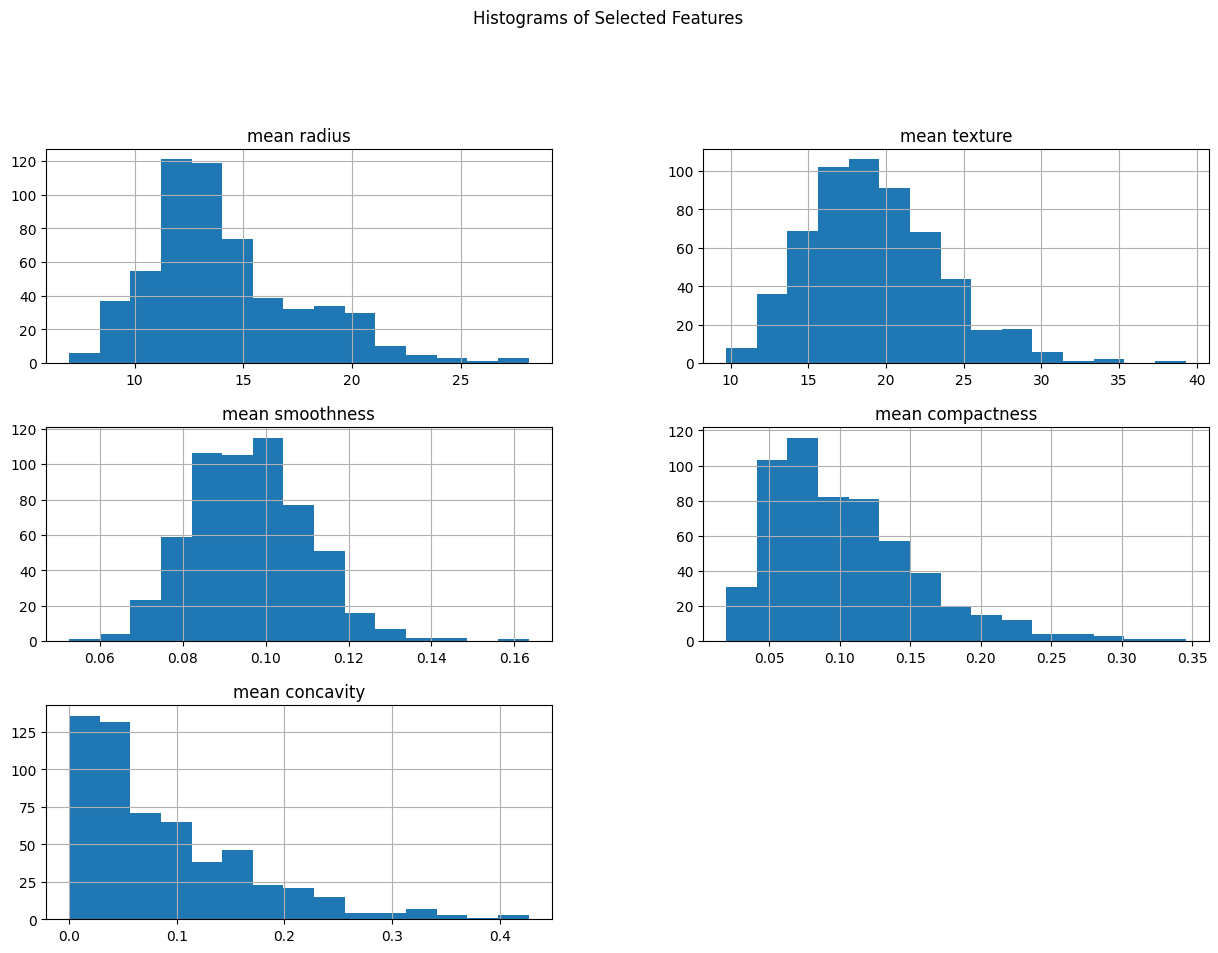

In [15]:
# Feature distribution for the first few features
features_to_plot = feature_names
df[features_to_plot].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Selected Features', y=1.02)
plt.show()

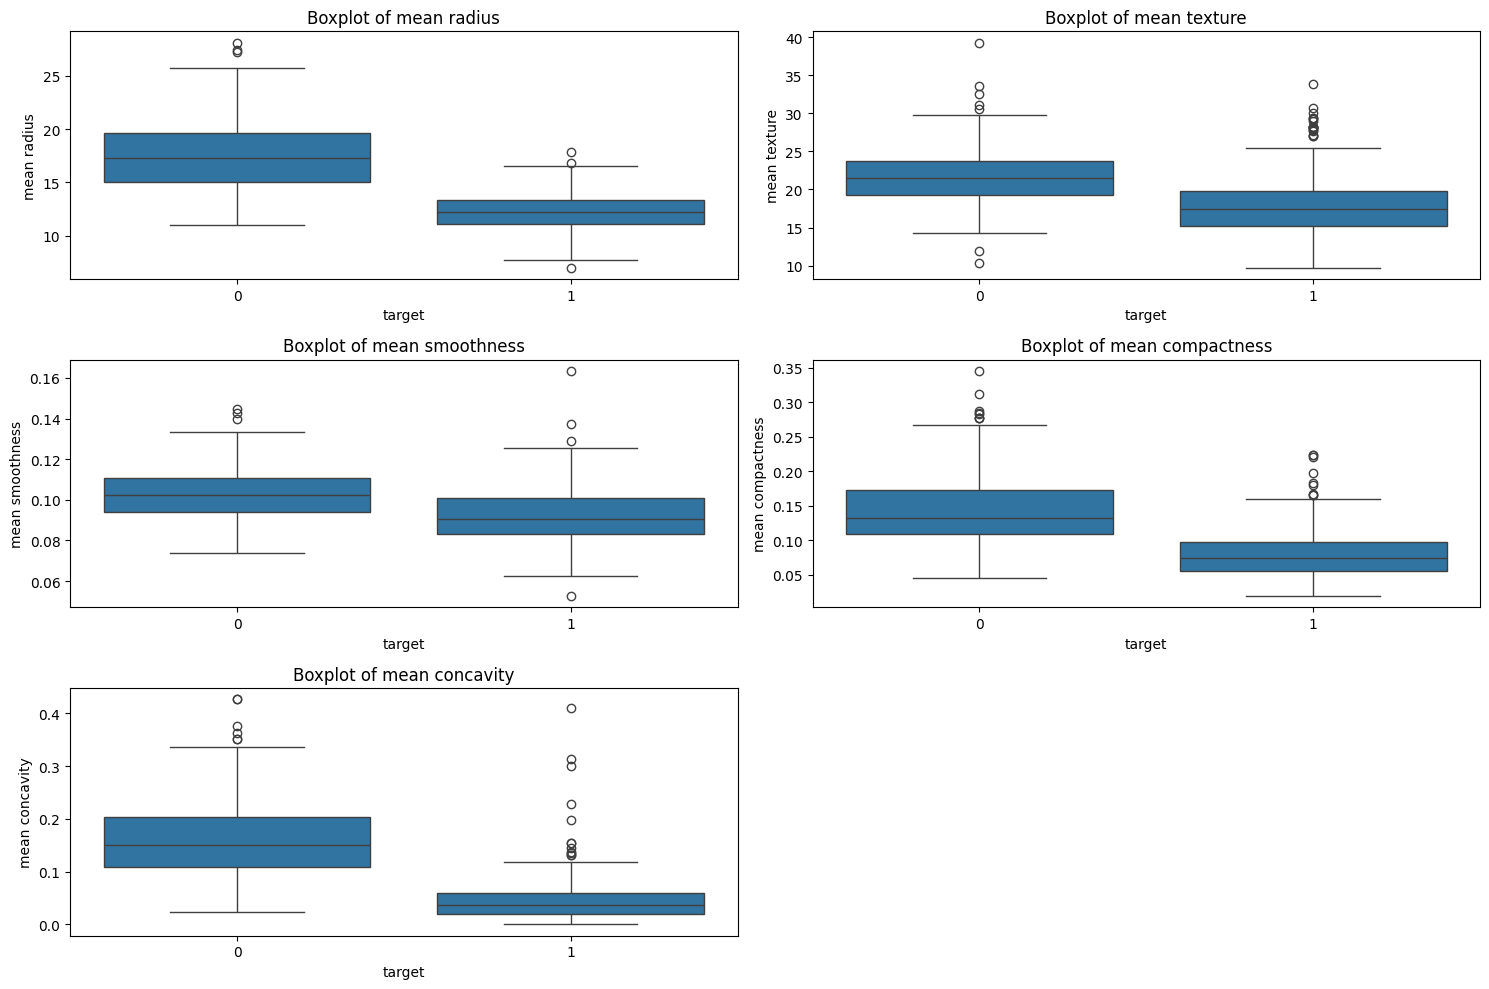

In [16]:
# Boxplots to visualize the distribution of features across the classes
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [9]:
df_reduced.to_csv('data_reduced.csv', index=False)